In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
strg = pd.read_csv('Hero Strength.csv')
agi = pd.read_csv('Hero Agility.csv')
intel = pd.read_csv('Hero Intelligence.csv')

In [65]:
her = strg.append(agi)
hero = her.append(intel)

In [66]:
hero = hero.sort_values('Hero')
hero = hero.reset_index()
hero = hero.drop(['index'],axis=1)

In [67]:
hero

,Type,Hero,Strength,Agility,Intelligence,Growth Strength,Growth Agility,Growth Intelligence,Health,Health Regen,Mana,Mana Regen,Armor,Attack Speed Per Second,Damage,Magic Res,Movement Speed,Attack Speed,Turn Rate,Vision Range,Attack Range,Projectille Speed,Attack Animation Speed,Base Time Attack,Damage Blocked,Role
0,Strength,Abaddon,23,23,18,3.0,1.5,2.0,660,3.30,291,0.90,2.83,0.84,51‒61,25%,325,120,0.6,1800/800,150,Instant,0.56+0.41,1.7,16,"['Support', 'Carry', 'Durable']"
1,Strength,Alchemist,25,22,25,2.7,1.5,1.8,700,2.50,375,1.25,2.67,0.72,49‒58,25%,305,100,0.6,1800/800,150,Instant,0.35+0.65,1.7,16,"['Carry', 'Support', 'Durable', 'Disabler', 'I..."
2,Intelligence,Ancient Apparition,20,20,23,1.9,2.2,3.4,600,2.00,351,1.15,2.33,0.71,44‒54,25%,285,100,0.6,1800/800,675,1250,0.45+0.3,1.7,0,"['Support', 'Disabler', 'Nuker']"
3,Agility,Anti-Mage,23,24,12,1.3,2.8,1.8,660,2.55,219,0.60,3.00,0.89,53‒57,25%,310,100,0.6,1800/800,150,Instant,0.3+0.6,1.4,16,"['Carry', 'Escape', 'Nuker']"
4,Agility,Arc Warden,23,16,24,2.8,2.5,2.6,660,2.55,363,1.20,1.67,0.68,47-57,25%,285,100,0.7,1800/800,625,900,0.3+0.7,1.7,0,"['Carry', 'Escape', 'Nuker']"
5,Strength,Axe,25,20,18,3.4,2.2,1.6,700,5.25,291,0.90,2.33,0.71,52‒56,25%,310,100,0.6,1800/800,150,Instant,0.4+0.5,1.7,16,"['Initiator', 'Durable', 'Disabler', 'Jungler'..."
6,Intelligence,Bane,22,22,22,2.6,2.6,2.6,640,2.20,339,1.10,4.67,0.72,57‒63,25%,305,100,0.6,1800/1200,400,900,0.3+0.7,1.7,0,"['Support', 'Disabler', 'Nuker', 'Durable']"
7,Intelligence,Batrider,28,15,22,2.9,1.8,2.9,760,4.55,339,1.10,3.50,0.68,38‒42,25%,295,100,0.9,1200/800,375,900,0.3+0.54,1.7,0,"['Initiator', 'Jungler', 'Disabler', 'Escape']"
8,Strength,Beastmaster,23,18,16,2.9,1.6,1.9,660,2.30,267,0.80,3.00,0.69,58‒62,25%,305,100,0.6,1800/800,150,Instant,0.3+0.7,1.7,16,"['Initiator', 'Disabler', 'Durable', 'Nuker']"
9,Agility,Bloodseeker,24,22,17,2.7,3.4,2.0,680,2.40,279,0.85,5.67,0.72,57‒63,25%,300,100,0.6,1800/800,150,Instant,0.43+0.74,1.7,16,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."


In [54]:
hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     121 non-null    object 
 1   Hero                     121 non-null    object 
 2   Strength                 121 non-null    int64  
 3   Agility                  121 non-null    int64  
 4   Intelligence             121 non-null    int64  
 5   Growth Strength          121 non-null    float64
 6   Growth Agility           121 non-null    float64
 7   Growth Intelligence      121 non-null    float64
 8   Health                   121 non-null    int64  
 9   Health Regen             121 non-null    float64
 10  Mana                     121 non-null    int64  
 11  Mana Regen               121 non-null    float64
 12  Armor                    121 non-null    float64
 13  Attack Speed Per Second  121 non-null    float64
 14  Damage                   1

In [55]:
hero['Damage']=hero['Damage'].astype('object')

In [56]:
hero['Damage_min']=[i[0:2] for i in hero['Damage']]
hero['Damage_max']=[i[3:5] for i in hero['Damage']]
hero['Damage_min']=hero['Damage_min'].astype('int64')
hero['Damage_max']=hero['Damage_max'].astype('int64')
hero['Damage_avg']=(hero['Damage_min']+hero['Damage_max'])/2
hero.drop(['Damage_min','Damage_max'],axis=1,inplace=True)

In [57]:
hero['Magic Res'] = [i[0:2] for i in hero['Magic Res']]
hero['Magic Res'] = hero['Magic Res'].astype('int64')

In [58]:
hero['Day Vision'] = hero['Vision Range'].apply(lambda x:x.split('/')[0])
hero['Night Vision'] = hero['Vision Range'].apply(lambda x:x.split('/')[1])
hero['Day Vision'] = hero['Day Vision'].astype('int64')
hero['Night Vision'] = hero['Night Vision'].astype('int64')
hero.drop(['Vision Range','Attack Animation Speed','Damage','Magic Res','Damage Blocked','Base Time Attack','Role'],axis=1,inplace=True)

In [59]:
hero.loc[hero['Projectille Speed']=='Instant','Projectille Speed']='5000'
hero['Projectille Speed'] = hero['Projectille Speed'].astype('int64')
hero['Attack Type']=np.where(hero['Projectille Speed']>3100,'Melee','Range')

In [62]:
hero.to_csv('hero_clean.csv',index=False)

In [61]:
hero.nunique()

Type                         3
Hero                       121
Strength                    15
Agility                     19
Intelligence                17
Growth Strength             27
Growth Agility              33
Growth Intelligence         31
Health                      15
Health Regen                37
Mana                        17
Mana Regen                  25
Armor                       38
Attack Speed Per Second     26
Movement Speed              12
Attack Speed                 6
Turn Rate                    4
Attack Range                28
Projectille Speed           14
Damage_avg                  39
Day Vision                   3
Night Vision                 5
Attack Type                  2
dtype: int64

In [41]:
hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     121 non-null    object 
 1   Hero                     121 non-null    object 
 2   Strength                 121 non-null    int64  
 3   Agility                  121 non-null    int64  
 4   Intelligence             121 non-null    int64  
 5   Growth Strength          121 non-null    float64
 6   Growth Agility           121 non-null    float64
 7   Growth Intelligence      121 non-null    float64
 8   Health                   121 non-null    int64  
 9   Health Regen             121 non-null    float64
 10  Mana                     121 non-null    int64  
 11  Mana Regen               121 non-null    float64
 12  Armor                    121 non-null    float64
 13  Attack Speed Per Second  121 non-null    float64
 14  Magic Res                1

In [45]:
stat = hero[['Hero','Strength','Agility','Intelligence','Growth Strength','Growth Agility','Growth Intelligence','Health','Mana','Health Regen','Mana Regen','Armor','Attack Speed','Magic Res','Movement Speed','Turn Rate','Attack Range','Damage Blocked','Damage_avg','Day Vision','Night Vision']]

In [46]:
stat

,Hero,Strength,Agility,Intelligence,Growth Strength,Growth Agility,Growth Intelligence,Health,Mana,Health Regen,Mana Regen,Armor,Attack Speed,Magic Res,Movement Speed,Turn Rate,Attack Range,Damage Blocked,Damage_avg,Day Vision,Night Vision
0,Abaddon,23,23,18,3.0,1.5,2.0,660,291,3.30,0.90,2.83,120,25,325,0.6,150,16,56.0,1800,800
1,Alchemist,25,22,25,2.7,1.5,1.8,700,375,2.50,1.25,2.67,100,25,305,0.6,150,16,53.5,1800,800
2,Ancient Apparition,20,20,23,1.9,2.2,3.4,600,351,2.00,1.15,2.33,100,25,285,0.6,675,0,49.0,1800,800
3,Anti-Mage,23,24,12,1.3,2.8,1.8,660,219,2.55,0.60,3.00,100,25,310,0.6,150,16,55.0,1800,800
4,Arc Warden,23,16,24,2.8,2.5,2.6,660,363,2.55,1.20,1.67,100,25,285,0.7,625,0,52.0,1800,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Windranger,18,17,18,3.0,1.4,3.6,560,291,1.80,0.90,1.83,100,25,290,0.8,600,0,48.0,1800,800
117,Winter Wyvern,24,16,26,2.6,1.9,3.6,680,387,2.40,1.30,2.67,100,25,285,0.6,425,0,43.5,1800,800
118,Witch Doctor,18,13,22,2.3,1.4,3.3,560,339,1.80,1.10,2.17,100,25,300,0.6,600,0,56.0,1800,800
119,Wraith King,22,18,18,3.0,1.7,1.6,640,291,2.20,0.90,2.00,100,25,315,0.6,150,16,61.0,1800,800


In [47]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hero                 121 non-null    object 
 1   Strength             121 non-null    int64  
 2   Agility              121 non-null    int64  
 3   Intelligence         121 non-null    int64  
 4   Growth Strength      121 non-null    float64
 5   Growth Agility       121 non-null    float64
 6   Growth Intelligence  121 non-null    float64
 7   Health               121 non-null    int64  
 8   Mana                 121 non-null    int64  
 9   Health Regen         121 non-null    float64
 10  Mana Regen           121 non-null    float64
 11  Armor                121 non-null    float64
 12  Attack Speed         121 non-null    int64  
 13  Magic Res            121 non-null    int64  
 14  Movement Speed       121 non-null    int64  
 15  Turn Rate            121 non-null    flo

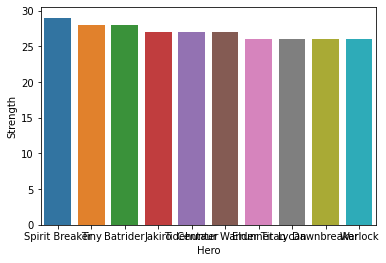

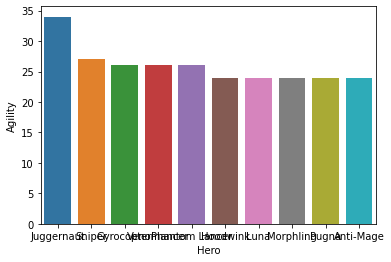

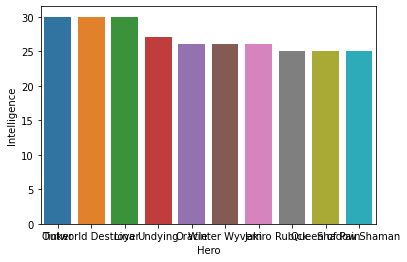

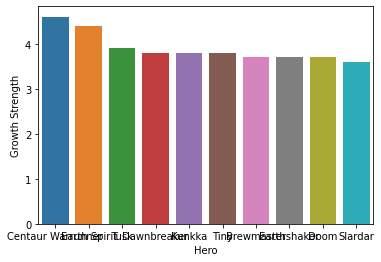

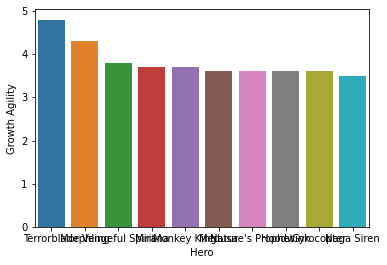

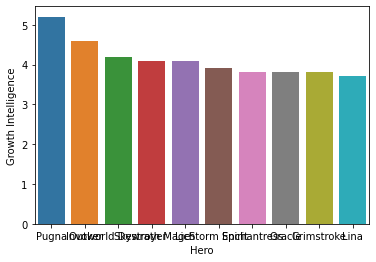

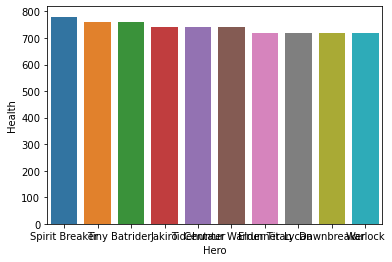

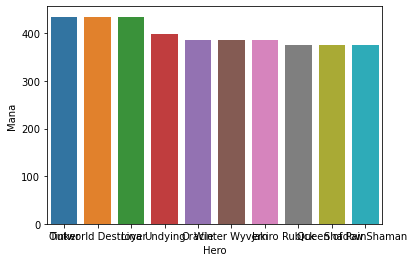

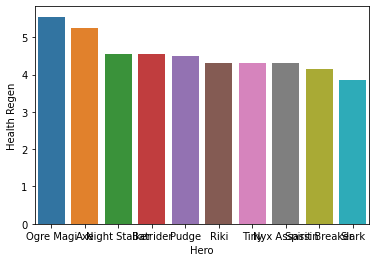

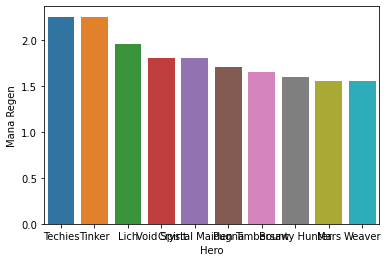

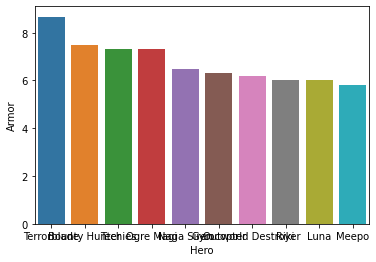

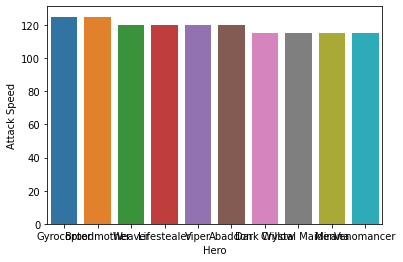

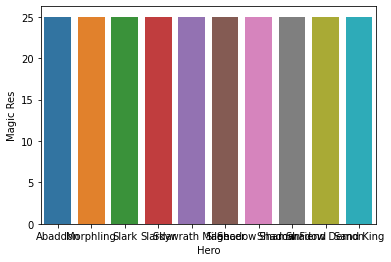

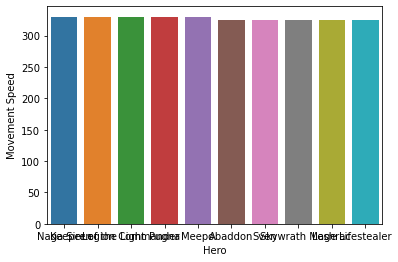

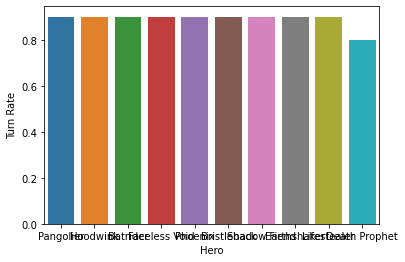

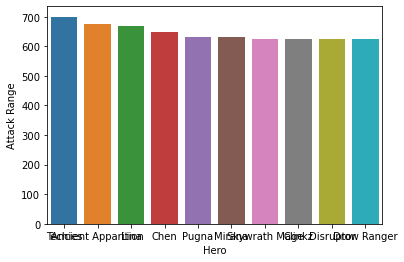

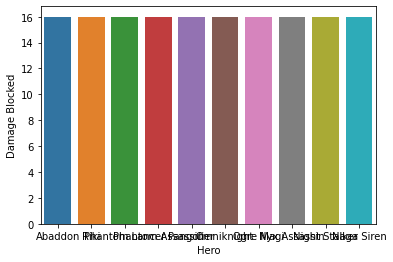

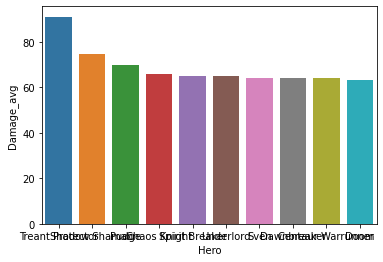

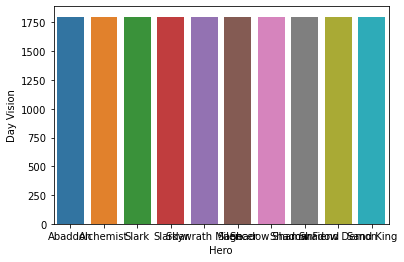

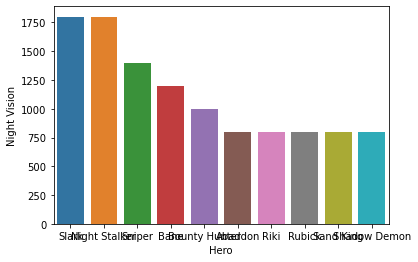

In [48]:
for i in stat.columns[1:]:
    a = stat.sort_values([f'{i}'],ascending=False)[['Hero',f'{i}']].head(10)
    sns.barplot(x='Hero',y=f'{i}',data = a)
    plt.show()

In [16]:
stat.sort_values('Strength')[['Hero','Strength']]

,Hero,Strength
98,Terrorblade,15
115,Weaver,16
17,Clinkz,16
75,Puck,17
41,Io,17
...,...,...
42,Jakiro,27
99,Tidehunter,27
7,Batrider,28
102,Tiny,28
